In [1]:
import os
directory_path="/kaggle/input/chest-xray-pneumonia/chest_xray"
classes = os.listdir(directory_path)
image_class=[]
for class_name in classes:
    class_path = os.path.join(directory_path, class_name)
    image_class.append(class_path)

In [2]:
import tensorflow as tf
import numpy as np 
import glob
import os
import matplotlib.pyplot as plt 
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import Sequential , Input, layers , losses , optimizers , Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
import tensorflow as tf
train=image_dataset_from_directory(image_class[4], image_size=(180 , 180),batch_size=64,shuffle=True , label_mode='binary')
val=image_dataset_from_directory(image_class[3] , image_size=(180 , 180),batch_size=64,shuffle=True,label_mode='binary')
test=image_dataset_from_directory(image_class[2], image_size=(180 , 180),batch_size=64,shuffle=True,label_mode='binary')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [3]:
import numpy as np

# Assuming you have already created the 'train' dataset using the 'image_dataset_from_directory' function

# Initialize empty lists to store images and labels
x = []
y = []

# Iterate over the dataset to access images and labels
for images, labels in train:
    # Append the batch of images to 'x'
    x.append(images.numpy())  # Convert to NumPy array for further processing (optional)

    # Append the batch of labels to 'y'
    y.append(labels.numpy())  # Convert to NumPy array for further processing (optional)

# Concatenate the lists to get the full 'x' and 'y' arrays
x = np.concatenate(x, axis=0)
y = np.concatenate(y, axis=0)

# 'x' is now an array containing all the input images with shape (total_samples, image_height, image_width, num_channels)
# 'y' is now an array containing all the labels with shape (total_samples,) in binary format

# Optionally, you can check the shapes of 'x' and 'y':
print("Shape of 'x':", x.shape)
print("Shape of 'y':", y.shape)


Shape of 'x': (5216, 180, 180, 3)
Shape of 'y': (5216, 1)


In [4]:
x=x/250

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [6]:
import numpy as np

# Assuming you have already loaded the images into the `x` array
# x = np.array(x)

# Get the shape of the `x` array
image_shape = x[0].shape  # Assuming the images have the same shape, so we get the shape of the first image

print("Input image shape:", image_shape)


Input image shape: (180, 180, 3)


In [7]:
# Get the shape of the `x` array
num_images, height, width = x.shape[:3]  # Extracting the first three dimensions

# If the images are grayscale, there won't be a fourth dimension (channels)
# In that case, set channels to 1
channels = 1 if len(x.shape) == 3 else x.shape[3]

print("Number of images:", num_images)
print("Image height:", height)
print("Image width:", width)
print("Number of channels (e.g., 3 for RGB, 1 for grayscale):", channels)

Number of images: 5216
Image height: 180
Image width: 180
Number of channels (e.g., 3 for RGB, 1 for grayscale): 3


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2

# Define your CNN model with L2 regularization
cnn = Sequential([
    Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(180, 180, 3),kernel_regularizer=l2(0.01)),
    MaxPooling2D((2, 2)),
    Conv2D(64, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu',kernel_regularizer=l2(0.01)),
    Dense(7, activation='softmax',kernel_regularizer=l2(0.01))
])

# Compile the model
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [9]:
batch_size = 32
epochs = 20
history=cnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/20
123/123 [==============================] - 21s 44ms/step - loss: 0.8148 - accuracy: 0.8865 - val_loss: 0.4803 - val_accuracy: 0.8911
Epoch 2/20
123/123 [==============================] - 5s 38ms/step - loss: 0.3421 - accuracy: 0.9353 - val_loss: 0.2715 - val_accuracy: 0.9586
Epoch 3/20
123/123 [==============================] - 5s 37ms/step - loss: 0.2640 - accuracy: 0.9542 - val_loss: 0.2949 - val_accuracy: 0.9486
Epoch 4/20
123/123 [==============================] - 5s 37ms/step - loss: 0.2519 - accuracy: 0.9576 - val_loss: 0.2227 - val_accuracy: 0.9663
Epoch 5/20
123/123 [==============================] - 4s 37ms/step - loss: 0.5817 - accuracy: 0.8995 - val_loss: 0.3779 - val_accuracy: 0.9379
Epoch 6/20
123/123 [==============================] - 5s 37ms/step - loss: 0.2866 - accuracy: 0.9519 - val_loss: 0.2921 - val_accuracy: 0.9425
Epoch 7/20
123/123 [==============================] - 5s 37ms/step - loss: 0.2682 - accuracy: 0.9494 - val_loss: 0.2241 - val_accuracy: 0.957

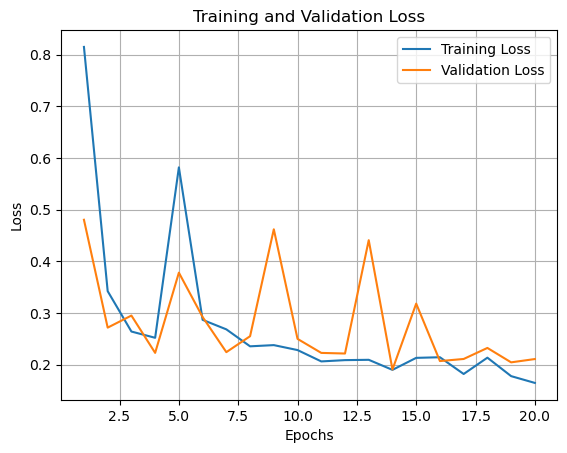

In [10]:

# Extract the training and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a list of epoch numbers (1 to number of epochs)
epochs = range(1, len(train_loss) + 1)

# Plot the loss graph
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()




